make sure you have all the required modules installed before importing

In [1]:

import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline
from pandas_datareader import data
from datetime import datetime
from __future__ import division
import yfinance as yf

We will use Yahoo to grab some data for some tech stocks

In [2]:
# The tech stocks we'll use for this analysis
tech_list=['AAPL','GOOG','MSFT','AMZN'] 


# Set up End and Start times for data grab
end=datetime.now() 
start = datetime(end.year-1,end.month,end.day)

# using yf.download function to obtain data in a Data Fram
google = yf.download("GOOG",start,end)
print('GOT GOOGLES DATA')

apple = yf.download("AAPL",start,end)
print("GOT APPLE,S DATA")

Microsoft = yf.download("MSFT",start,end)
print("GOT MICROSOFT,S DATA")

Amazon = yf.download("AMZN",start,end)
print("GOT AMAZON,S DATA")


[*********************100%***********************]  1 of 1 completed
GOT GOOGLES DATA
[*********************100%***********************]  1 of 1 completed
GOT APPLE,S DATA
[*********************100%***********************]  1 of 1 completed
GOT MICROSOFT,S DATA
[*********************100%***********************]  1 of 1 completed
GOT AMAZON,S DATA


In [3]:
# let,s work on apple data frame

In [4]:
 # Summary of  Stats
apple.describe()

,Open,High,Low,Close,Adj Close,Volume
count,250.000000,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,159.037041,160.813520,157.455080,159.189120,158.848648,7.045206e+07
std,18.063108,17.832128,18.369593,18.083751,18.232190,2.352245e+07
min,126.010002,127.769997,124.169998,125.019997,124.656982,3.145820e+07
25%,145.812500,147.320004,143.957497,145.915001,145.452457,5.262450e+07
50%,154.719994,156.915001,153.360001,154.824997,154.401749,6.583690e+07
75%,172.305004,173.387501,171.302498,172.092506,172.070007,8.116722e+07
max,196.240005,198.229996,195.279999,196.449997,196.449997,1.647624e+08


In [5]:
# General Info about the apple data frame
apple.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2022-08-08 to 2023-08-04
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       250 non-null    float64
 1   High       250 non-null    float64
 2   Low        250 non-null    float64
 3   Close      250 non-null    float64
 4   Adj Close  250 non-null    float64
 5   Volume     250 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


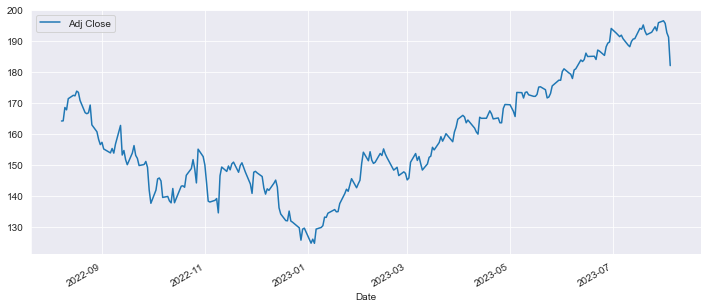

In [6]:
# Let's see a historical view of the closing price
apple['Adj Close'].plot(legend=True,figsize=(12,5))
plt.savefig('adjclose_apple.jpg')

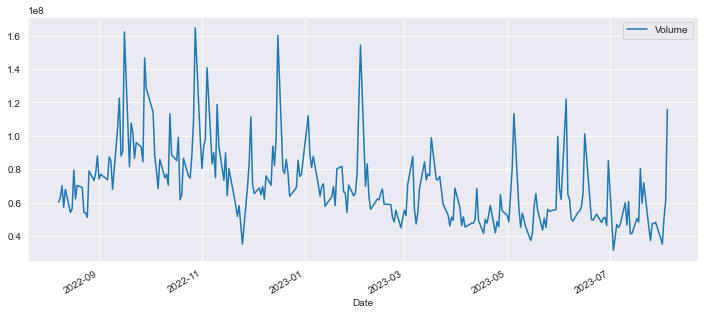

In [7]:
# Now let's plot the total volume of stock being traded each day 
apple['Volume'].plot(legend=True,figsize=(12,5))
plt.savefig('volume_apple.jpg')

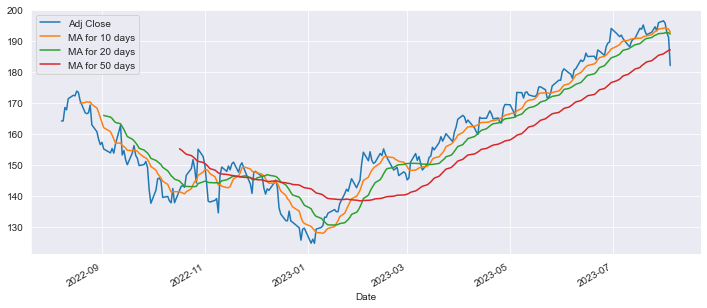

In [8]:
#let's  caculate the moving average for the stock and plot it 
# A moving average is a statistic that captures the average change in a data series over time
ma_day=[10,20,50] #for moving averages for 10,20,50 days

for ma in ma_day:
    column_name="MA for %s days" %(str(ma))
    
    #apple[column_name]=pd.rolling_mean(apple['Adj Close'],ma)
    apple[column_name] = apple['Adj Close'].rolling(window=ma).mean()
    

    
apple[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(figsize=(12,5))
plt.savefig('movingAvg_apple.jpg')

Daily Return Analysis

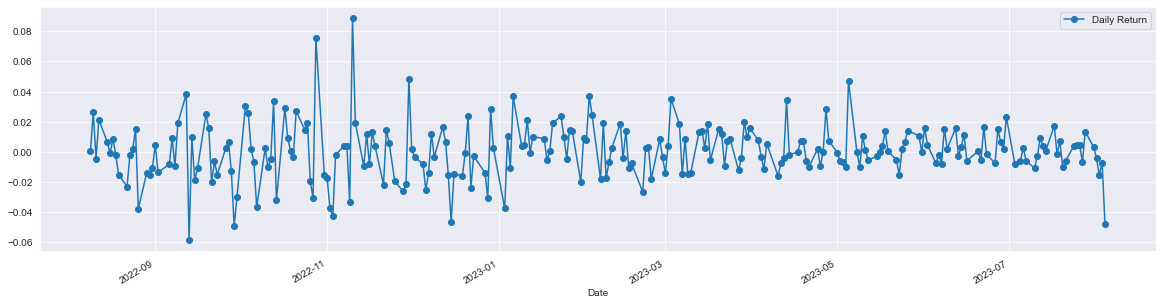

In [9]:
# We'll use pct_change to find the percent change for each day and add it to the new column Daily Return
apple['Daily Return']=apple['Adj Close'].pct_change()
# Then we'll plot the daily return percentage
apple['Daily Return'].plot(legend=True,figsize=(20,5),marker='o')
plt.savefig('DailyRet_apple.jpg')


C:\Users\welcome\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


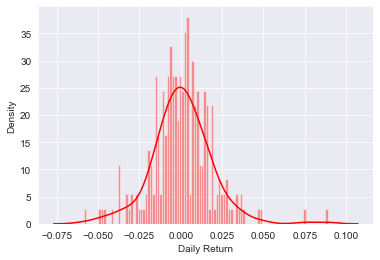

In [10]:
#ploting Daily Return
sns.distplot(apple['Daily Return'],bins=100,color='red')
plt.savefig('DailyRet_distribustion_apple.jpg')


In [11]:
# Grab all the closing prices for the tech stock list into one DataFrame
closing_df = yf.download(tech_list,start,end)['Adj Close'] #Data frame for Adj Close of stocks
closing_df.head()

[*********************100%***********************]  4 of 4 completed


,AAPL,AMZN,GOOG,MSFT
Date,,,,
2022-08-08,164.119019,139.410004,118.139999,277.636353
2022-08-09,164.168793,137.830002,117.500000,279.597321
2022-08-10,168.469131,142.690002,120.650002,286.391663
2022-08-11,167.722534,140.639999,119.820000,284.272156
2022-08-12,171.316086,143.550003,122.650002,289.115356


In [12]:
 #Data frame for Daily Returns of stocks
tech_rets = closing_df.pct_change()
tech_rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2022-08-08,NaN,NaN,NaN,NaN
2022-08-09,0.000303,-0.011333,-0.005417,0.007063
2022-08-10,0.026195,0.035261,0.026809,0.024300
2022-08-11,-0.004432,-0.014367,-0.006879,-0.007401
2022-08-12,0.021426,0.020691,0.023619,0.017037


 Comparing the daily percentage return of two stocks to check how correlated they are

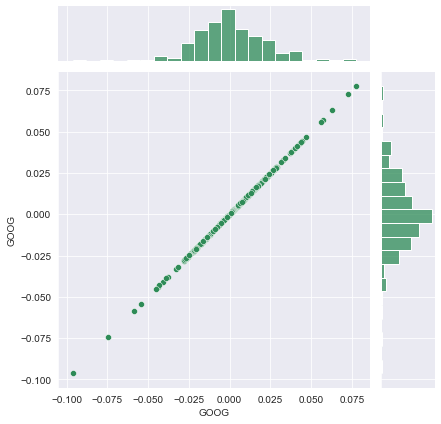

In [13]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot(x='GOOG', y='GOOG', data=tech_rets, kind='scatter',color='seagreen')
# This shows that google stock is perfectly correlated to itself
plt.savefig('linear-relation_google.jpg')

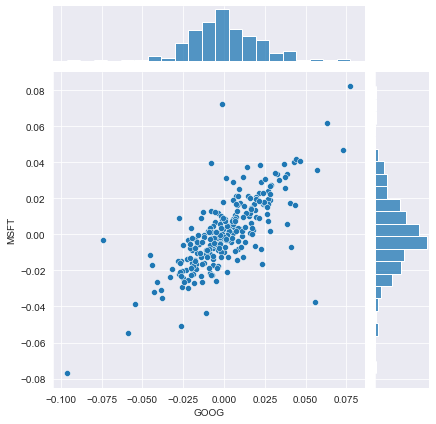

In [14]:
# We'll use jointplot to compare the daily returns of Google and Microsoft
sns.jointplot(x='GOOG', y='MSFT', data=tech_rets, kind='scatter')
plt.savefig('DailyRet_google_microsoft.jpg')

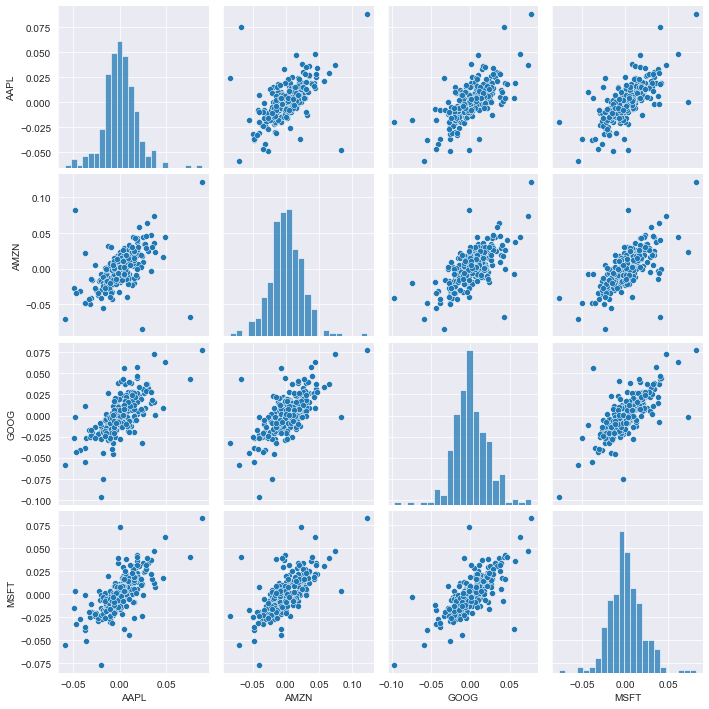

In [15]:
# We will call pairplot on our DataFrame for an automatic visual analysis of all the comparisons
sns.pairplot(tech_rets.dropna())
# Below we can see all the relationships on daily returns between all the stocks
plt.savefig('pairplot_DailyRet.jpg')

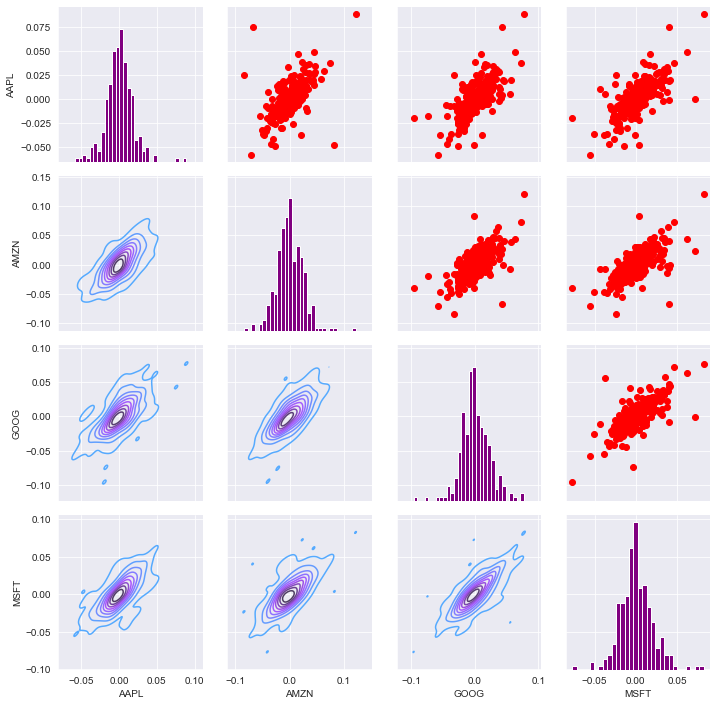

In [16]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='red')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,color='purple',bins=30)

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
plt.savefig('pairGride_DailyRet.jpg')

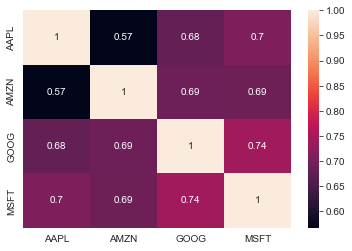

In [17]:
#we could also do a heat map plot, to get actual numerical values for the correlation
#between the stocks' daily return values. By comparing the closing prices, 
#we see an interesting relationship between Microsoft and Google.

corr_matrix_rets = tech_rets.dropna().corr()
sns.heatmap(corr_matrix_rets, annot=True)
plt.savefig('Heatmap_DailyRet.jpg')

We will also analyzed the correlation of the closing prices using this exact same technique

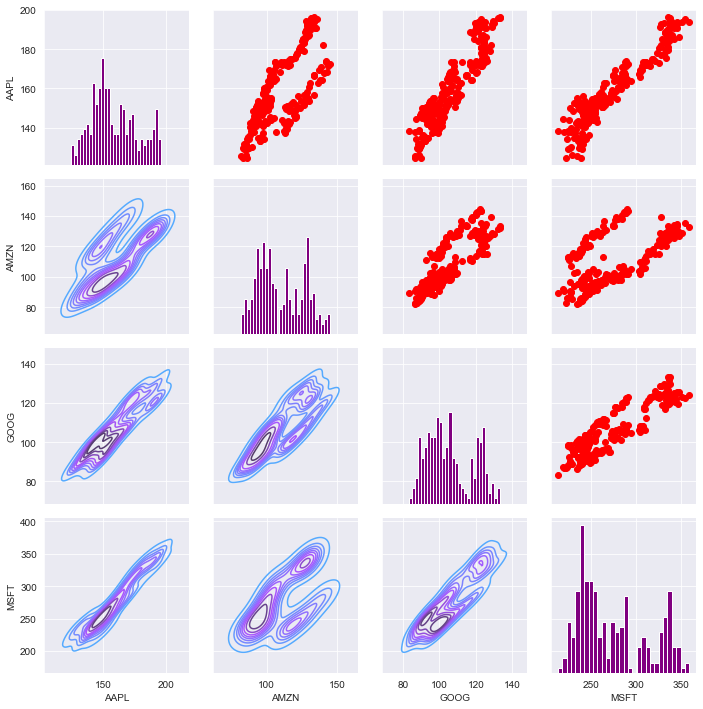

In [18]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df.dropna())

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='red')

# Finally we'll define the diagonal as a series of histogram plots of the closing price
returns_fig.map_diag(plt.hist,color='purple',bins=30)

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

'''In the figure below we can see a strong correlation between Microsoft and Apple closing prices'''
plt.savefig('Pairgrid_closePrice.jpg')

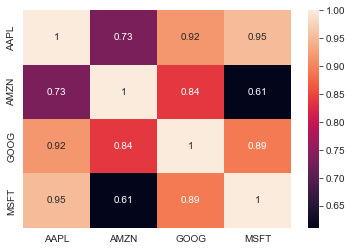

In [19]:
# We can see the correlations better by actual numerical values for the correlation by heat map
corr_matrix_closing = closing_df.dropna().corr()
sns.heatmap(corr_matrix_closing, annot=True)
'''In the figure below we can see a that numericalvalue of correlation between Microsoft and Apple closing prices'''
plt.savefig('Heatmap_closePrice.jpg')

Risk Analysis

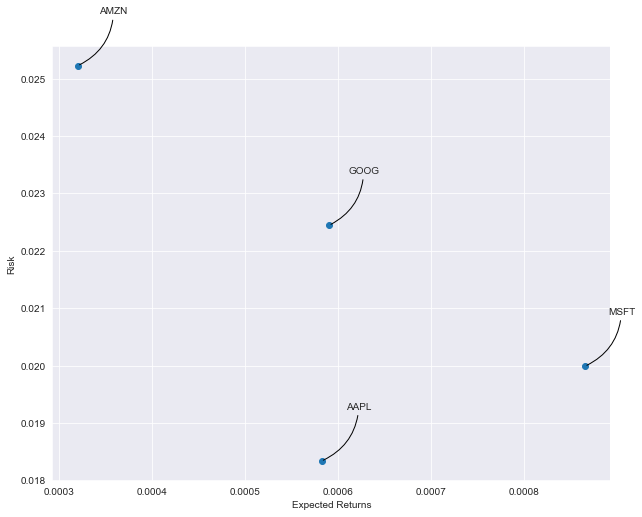

In [20]:
#fix scatter plot and anotate

# Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_rets DataFrame
rets = tech_rets.dropna()

plt.scatter(rets.mean(),rets.std())

#Set the plot axis titles
plt.xlabel('Expected Returns')
plt.ylabel('Risk')

'''we calculate risk by taking standard diviation of returns

It's worth noting that standard deviation alone may not fully capture all aspects of a stock's risk.
Other factors such as market conditions, company-specific news,
and industry trends should also be considered when assessing the risk of a stock.'''

# Label the scatter plots
for label, x, y in zip(rets.columns,rets.mean(), rets.std()):
    plt.annotate(
    label,
    xy = (x,y),xytext = (50,50),
    textcoords = 'offset points', ha = 'right', va = 'bottom',
    arrowprops = dict(arrowstyle = '-',connectionstyle = 'arc3,rad=-0.3',color='black'))
    
    
    
    # we should pick stock with highest expected return and lowest risk 
    # So as seen in figure below Apple has lowest risk with High Returns
dpi_value = 300
plt.gcf().set_size_inches(10, 8)
plt.savefig('Risk-vs-Returns.jpg')    

Value at risk 

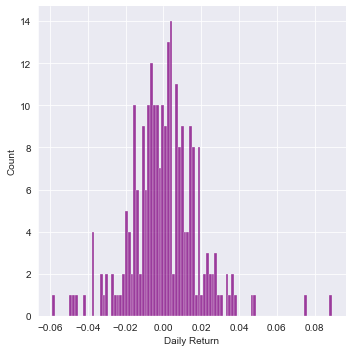

In [21]:
#Value at risk using the "bootstrap" method
sns.displot(apple['Daily Return'].dropna(),bins=100,color='purple')

In [22]:
rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2022-08-09,0.000303,-0.011333,-0.005417,0.007063
2022-08-10,0.026195,0.035261,0.026809,0.024300
2022-08-11,-0.004432,-0.014367,-0.006879,-0.007401
2022-08-12,0.021426,0.020691,0.023619,0.017037
2022-08-15,0.006333,-0.002578,0.001875,0.005344


In [23]:
# The 0.05 empirical quantile of daily returns
rets['AAPL'].quantile(0.05) #with 95% times your worst daily lose would not exceed this value

-0.030294880212069653

The 0.05 empirical quantile of daily returns is at -0.028. That means that with 95% confidence, 
our worst daily loss will not exceed 2.8%.
If we have a 1 million dollar investment, our one-day 5% VaR is 0.028 * 1,000,000 = $28,000.

In [24]:

# Value at Risk by monte Carlos Method
'''Using the Monte Carlo to run many trials with random market conditions,
then we'll calculate portfolio losses for each trial. 
After this, we'll use the aggregation of all these simulations to establish how risky the stock is.'''

days = 365                     # Set up our time horizon
dt = 1/days                    # Now our delta
mu = rets.mean()['GOOG']       # Now let's grab our mu (drift) from the expected return data we got for AAPL
sigma = rets.std()['GOOG']     # Now let's grab our mu (drift) from the expected return data we got for AAPL


#function that takes in the starting price and number of days,
#and uses teh sigma and mu we already calculated form out daily returns
def stock_monte_carlo(start_price,days,mu,sigma):
    
    # Define a price array
    price = np.zeros(days)
    price[0] = start_price
    
    # Schok and Drift
    shock = np.zeros(days)
    drift = np.zeros(days)
    
        # Run price array for number of days
    for x in range(1,days):
        
        shock[x] = np.random.normal(loc=mu*dt,scale= sigma*np.sqrt(dt))
        drift[x] = mu*dt
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
    #print(price)
    return price    
        

For more info on the Monte Carlo method for stocks, 
check out the following link: http://www.investopedia.com/articles/07/montecarlo.asp

In [25]:
google.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-08-08,119.120003,120.860001,117.830002,118.139999,118.139999,17061100
2022-08-09,117.989998,118.199997,116.559998,117.500000,117.500000,15424300
2022-08-10,119.589996,121.779999,119.360001,120.650002,120.650002,20497000
2022-08-11,122.080002,122.339996,119.550003,119.820000,119.820000,16671600
2022-08-12,121.160004,122.650002,120.400002,122.650002,122.650002,16121100


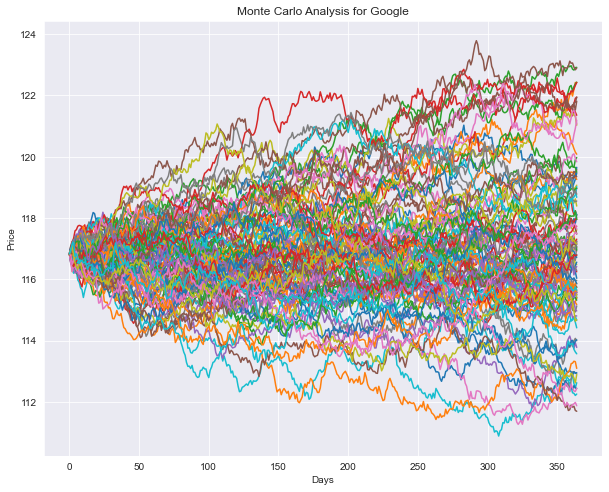

In [26]:
# Get start price from GOOG.head()
start_price = 116.83

for x in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
    plt.xlabel("Days")
    plt.ylabel("Price")  
    plt.title('Monte Carlo Analysis for Google')   

dpi_value = 300
plt.gcf().set_size_inches(10, 8)
plt.savefig('Monte Carlo Analysis for Google.jpg')

In [27]:
#Let's get a histogram of the end results for a much larger run

# Set a large numebr of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

for run in range(runs):
    # Create an empty matrix to hold the end price data
    simulations[run] = stock_monte_carlo(start_price, days, mu, sigma)[days-1]

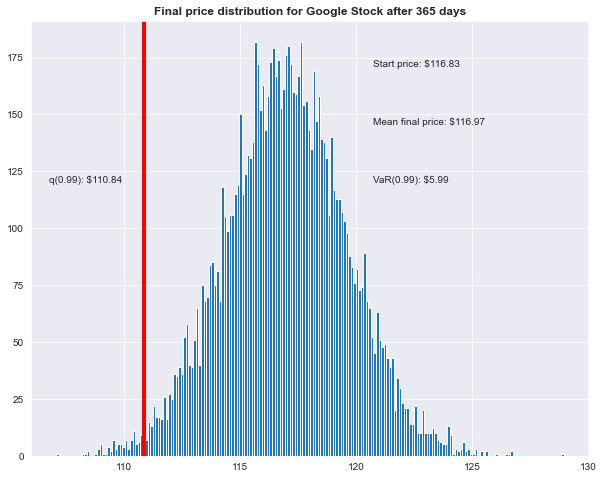

In [28]:
# Now we'lll define q as the 1% empirical qunatile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations,1)

# Now let's plot the distribution of the end prices
plt.hist(simulations,bins=200)


# Title
plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold');
             
# Starting Price
plt.figtext(0.6, 0.8, "Start price: $%.2f" % start_price)

# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % np.mean(simulations))

# Variance of the price (within 99% confidence interval)
#q = np.percentile(simulations, 1)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')


dpi_value = 300
plt.gcf().set_size_inches(10, 8)
plt.savefig('PriceDistribution_googlr.jpg')

# Making Prediction of google Stock using Rnn 

In [67]:
# using yf.download function to obtain data in a Data Fram
end=datetime.now() 
en = datetime(end.year,end.month-2,end.day)
start = datetime(end.year-5,end.month,end.day)

#in data frame getting google,s 5 years stock information
dataset_train = yf.download("GOOG",start,en)
print('GOT GOOGLES DATA')
# getting the open stock prices into a training set
training_set = dataset_train.iloc[:, 1:2].values

[*********************100%***********************]  1 of 1 completed
GOT GOOGLES DATA


In [68]:
dataset_train

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-08-06,61.250000,61.304401,60.789848,61.238499,61.238499,21634000
2018-08-07,61.849998,62.558498,61.808498,62.111000,62.111000,29880000
2018-08-08,62.023499,62.825001,61.900398,62.280499,62.280499,27406000
2018-08-09,62.494999,62.777100,62.300499,62.455002,62.455002,16972000
2018-08-10,62.150002,62.284752,61.599998,61.880501,61.880501,22174000
...,...,...,...,...,...,...
2023-05-30,126.290001,126.379997,122.889999,124.639999,124.639999,27230700
2023-05-31,123.699997,124.900002,123.099998,123.370003,123.370003,41548800
2023-06-01,123.500000,125.040001,123.300003,124.370003,124.370003,25017700


In [69]:
training_set

array([[ 61.3044014 ],
       [ 62.55849838],
       [ 62.82500076],
       ...,
       [125.04000092],
       [126.74500275],
       [127.98999786]])

In [70]:
print(training_set.shape)




(1216, 1)


In [71]:
### Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)



In [72]:
#Creating a data structure with 60 timesteps and 1 output

X_train = []
y_train = []
for i in range(60, 1216):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)


In [73]:
#Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))



In [74]:
#Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [90]:
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from keras.callbacks import EarlyStopping


In [76]:
regressor = Sequential()  #Initialising the RNN

#Adding the LSTM layers
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

#Adding the output layer
regressor.add(Dense(units = 1))

#compiling
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [91]:
#Fitting the RNN to the Training set
filename = 'rnn_stock_copy1.h5'
checkpoint = ModelCheckpoint(filename,save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min', restore_best_weights=True)
#ann.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=100, callbacks=[checkpoint])
history = regressor.fit(X_train, y_train, epochs = 100, batch_size = 32, validation_split=0.1, callbacks=[checkpoint,early_stopping])

Epoch 1/100
33/33 [==============================] - 7s 218ms/step - loss: 0.0012 - val_loss: 4.2619e-04
Epoch 2/100


C:\Users\welcome\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


33/33 [==============================] - 8s 228ms/step - loss: 0.0011 - val_loss: 4.8313e-04
Epoch 3/100
33/33 [==============================] - 7s 205ms/step - loss: 0.0013 - val_loss: 4.4736e-04
Epoch 4/100
33/33 [==============================] - 6s 189ms/step - loss: 0.0011 - val_loss: 4.4084e-04
Epoch 5/100
33/33 [==============================] - 5s 138ms/step - loss: 0.0013 - val_loss: 9.4814e-04
Epoch 6/100
33/33 [==============================] - 5s 139ms/step - loss: 0.0012 - val_loss: 4.6107e-04
Epoch 7/100
33/33 [==============================] - 5s 140ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 8/100
33/33 [==============================] - 5s 138ms/step - loss: 0.0014 - val_loss: 0.0012
Epoch 9/100
33/33 [==============================] - 5s 139ms/step - loss: 0.0011 - val_loss: 4.3935e-04
Epoch 10/100
33/33 [==============================] - 5s 139ms/step - loss: 0.0011 - val_loss: 4.4789e-04
Epoch 11/100
33/33 [==============================] - 5s 148ms/step - loss

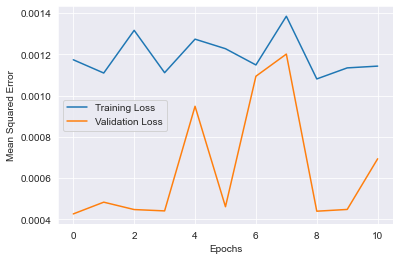

In [92]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

In [95]:
# Getting the real stock price for test set
end=datetime.now() 
en = datetime(end.year,end.month,end.day)
start = datetime(end.year,end.month-1,end.day-1)

dataset_test = yf.download("GOOG",start,en)
print('GOT GOOGLES DATA')
real_stock_price = dataset_test.iloc[:, 1:2].values

[*********************100%***********************]  1 of 1 completed
GOT GOOGLES DATA


In [96]:
dataset_test

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-07-05,120.059998,123.370003,120.059998,122.629997,122.629997,17830300
2023-07-06,120.639999,121.150002,119.250000,120.930000,120.930000,17732500
2023-07-07,120.889999,121.750000,120.089996,120.139999,120.139999,20982400
2023-07-10,119.070000,119.070000,116.639999,116.870003,116.870003,32960100
2023-07-11,116.760002,118.224998,115.830002,117.709999,117.709999,18286600
2023-07-12,119.300003,120.959999,119.000000,119.620003,119.620003,22059600
2023-07-13,121.540001,125.334999,121.059998,124.830002,124.830002,31535900
2023-07-14,125.129997,127.089996,124.900002,125.699997,125.699997,20482800
2023-07-17,126.059998,127.279999,124.500000,125.059998,125.059998,20675300


In [97]:
#Getting the predicted stock price

dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 0s 56ms/step


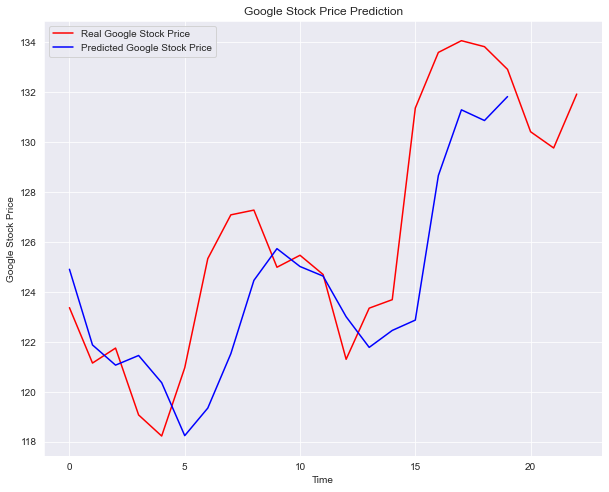

In [98]:
#Visualising the results

plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
#plt.show()

dpi_value = 300
plt.gcf().set_size_inches(10, 8)
plt.savefig('Pridicted-vs-real_google.jpg')


In [99]:
print(len(real_stock_price))
print(len(predicted_stock_price))

23
20


In [100]:
real_stock_price


array([[123.37000275],
       [121.15000153],
       [121.75      ],
       [119.06999969],
       [118.22499847],
       [120.95999908],
       [125.33499908],
       [127.08999634],
       [127.27999878],
       [124.98999786],
       [125.47000122],
       [124.69999695],
       [121.30000305],
       [123.34999847],
       [123.69000244],
       [131.36999512],
       [133.6000061 ],
       [134.07000732],
       [133.83000183],
       [132.91999817],
       [130.41999817],
       [129.77000427],
       [131.92999268]])

In [45]:
predicted_stock_price

array([[120.783   ],
       [120.608925],
       [119.5601  ],
       [118.40214 ],
       [118.29909 ],
       [119.09161 ],
       [119.64357 ],
       [119.64821 ],
       [119.581375],
       [119.661476],
       [119.26773 ],
       [118.09787 ],
       [117.75654 ],
       [118.76369 ],
       [121.12555 ],
       [123.36107 ],
       [124.10214 ],
       [123.9015  ],
       [122.74122 ],
       [121.365295]], dtype=float32)